In [76]:
from spiketimes.utils import p_adjust
from citalopram_project.load import get_data_dir, load_neurons, load_spikes
from citalopram_project.correlations import pairwise_correlation_spikes
# from citalopram_project.transforms import bin_spikes_interval, pivot, 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
sns.set_style("ticks")

neurons = load_neurons()
neurons = neurons.loc[lambda x: x.group.isin(["sal", "continuation"])]
df_ensembles = pd.read_parquet(get_data_dir() / "derived" / "spont_ensembles.parquet.gzip")
spikes = load_spikes(block_name="pre").merge(neurons[["neuron_id", "session_name"]])

In [74]:
def get_idx(ensemble_df, neuron_df):
    return (
        neuron_df[["neuron_id", "session_name"]]
        .merge(ensemble_df, how="left")
        .fillna(-100)
        .sort_values("ensemble_id")
        .neuron_id.values
    )

def _reindex(df: pd.DataFrame, idx: np.ndarray) -> pd.DataFrame:
    df = df.reindex(idx)
    df = df[idx]
    return df



sessions = neurons.session_name.unique()
session = sessions[2]

neurons_sesh = neurons.loc[lambda x: x.session_name == session]
spikes_sesh = spikes.loc[lambda x: x.session_name == session]
ensembles_sesh = df_ensembles.loc[lambda x: x.session_name == session]
df_corr = pairwise_correlation_spikes(spikes_sesh, bin_width=1, sigma=0, fillna=0)

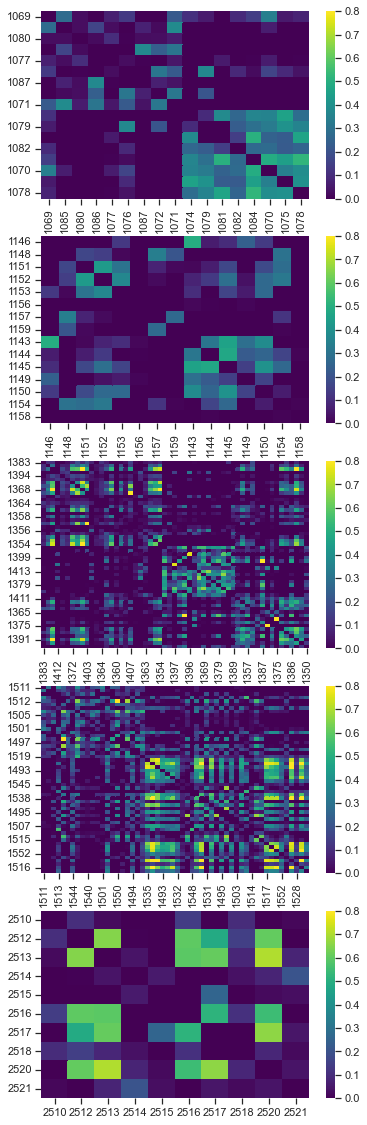

In [86]:
sessions = neurons.loc[lambda x: x.group =="sal"].session_name.unique()
_, axes = plt.subplots(nrows=len(sessions), figsize=(6, 20))
for i, session in enumerate(sessions):
    neurons_sesh = neurons.loc[lambda x: x.session_name == session]
    spikes_sesh = spikes.loc[lambda x: x.session_name == session]
    ensembles_sesh = df_ensembles.loc[lambda x: x.session_name == session]
    idx = get_idx(ensembles_sesh, neurons_sesh)
    df_corr = pairwise_correlation_spikes(spikes_sesh, bin_width=1, sigma=0, fillna=0)
    sns.heatmap(_reindex(df_corr, idx), cmap="viridis", vmin=0, vmax=0.8, ax=axes[i])

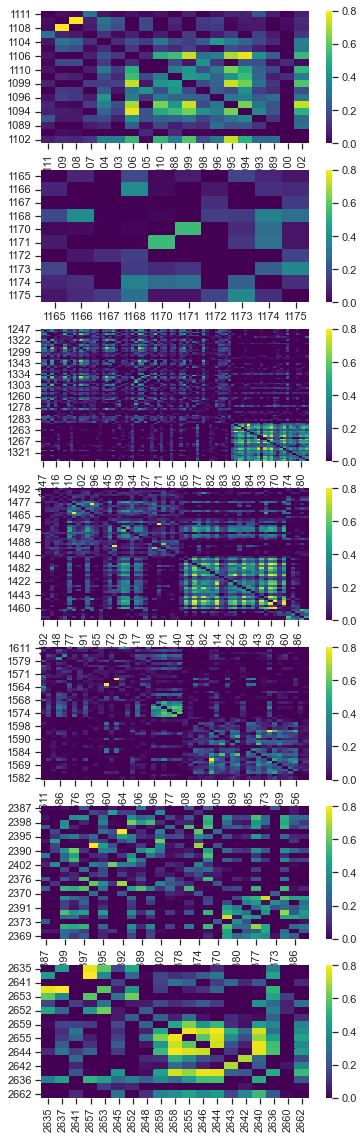

In [93]:
sessions = neurons.loc[lambda x: x.group =="continuation"].session_name.unique()
_, axes = plt.subplots(nrows=len(sessions), figsize=(6, 20))
for i, session in enumerate(sessions):
    neurons_sesh = neurons.loc[lambda x: x.session_name == session]
    spikes_sesh = spikes.loc[lambda x: x.session_name == session]
    ensembles_sesh = df_ensembles.loc[lambda x: x.session_name == session]
    idx = get_idx(ensembles_sesh, neurons_sesh)
    df_corr = pairwise_correlation_spikes(spikes_sesh, bin_width=1, sigma=0, fillna=0)
    sns.heatmap(_reindex(df_corr, idx), cmap="viridis", vmin=0, vmax=0.8, ax=axes[i])